# Electric Vehicles Market Size Analysis

Market size analysis for electric vehicles involves a multi-step process that includes defining the market scope, collecting and preparing data, analytical modelling, and communicating findings through visualization and reporting. Below is the process you can follow for the task of electric vehicles market size analysis:

+ Define whether the analysis is global, regional, or focused on specific countries.
+ Gather information from industry associations, market research firms (e.g., BloombergNEF, IEA), and government publications relevant to the EV market.
+ Use historical data to identify trends in EV sales, production, and market.
+ Analyze the market size and growth rates for different EV segments.
Based on the market size analysis, provide strategic recommendations for businesses looking to enter or expand in the EV market.

The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:

+ VIN (1-10): Partial Vehicle Identification Number.
+County: The county in which the vehicle is registered.
+ City: The city in which the vehicle is registered.
+ State: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
+ Postal Code: The postal code where the vehicle is registered.
+ Model Year: The year of the vehicle model.
+ Make: The manufacturer of the vehicle.
+ Model: The model of the vehicle.
+ Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
+ Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
+ Electric Range: The maximum range of the vehicle on a single charge (in miles).
+ Base MSRP: The Manufacturer’s Suggested Retail Price.
+ Legislative District: The legislative district where the vehicle is registered.
+ DOL Vehicle ID: Department of Licensing Vehicle Identification.
+ Vehicle Location: Geographic coordinates of the vehicle location.
+ Electric Utility: The electric utility service provider for the vehicle’s location.
+ 2020 Census Tract: The census tract for the vehicle’s location.

The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion. The specific goals include:

+ Assess the historical growth trend of EV registrations.
+ Forecast future EV registrations based on historical trends.
+ Analyze the distribution of EV registrations across different models, makes, and geographical regions.
+ Estimate the market size and growth potential of the EV market for upcoming years.
+ Provide insights to support stakeholders in decision-making processes related to production, infrastructure planning, and policy formulation.

### importing the necessary Python libraries and the dataset

In [2]:
# importing the necessary Python libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the dataset
ev_data = pd.read_csv('Electric_Vehicle_population_Data.csv')
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
s# make a copy of the datsset
ev_data_or = ev_data.copy()

### Data Cleaning

There null vlaues in columns like **Legislative District, County, City, Vehicle Location** etc. These rows will be dropped as they constitute a small fraction of the total data and would not in any way affect our analysis

There are no duplicate data in the dataset

In [5]:
# check data info
ev_data_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
#Check number of null value sper column
ev_data_or.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
# drop the null values
ev_data_or = ev_data_or.dropna()

In [10]:
# check for duplicated data
ev_data_or.duplicated().sum()

0

For the task of market size of electric vehicles analysis, we can explore the following areas:

+ EV Adoption Over Time: Analyze the growth of the EV population by model year.
+ Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
+ EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
+ Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
+ Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
+ Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.



## Analysis

### 1. Analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:

From the bar chart below, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.


In [ ]:
sns.set_style('whitegrid')

# plot ev adoption over time
plt.figure(figsize = (12, 6))
ev_adoption_by_year = ev_data_or['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, 
           palette='viridis')
plt.title('EV Adptio Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 2. Top 3 Counties Based on EV Registration

Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

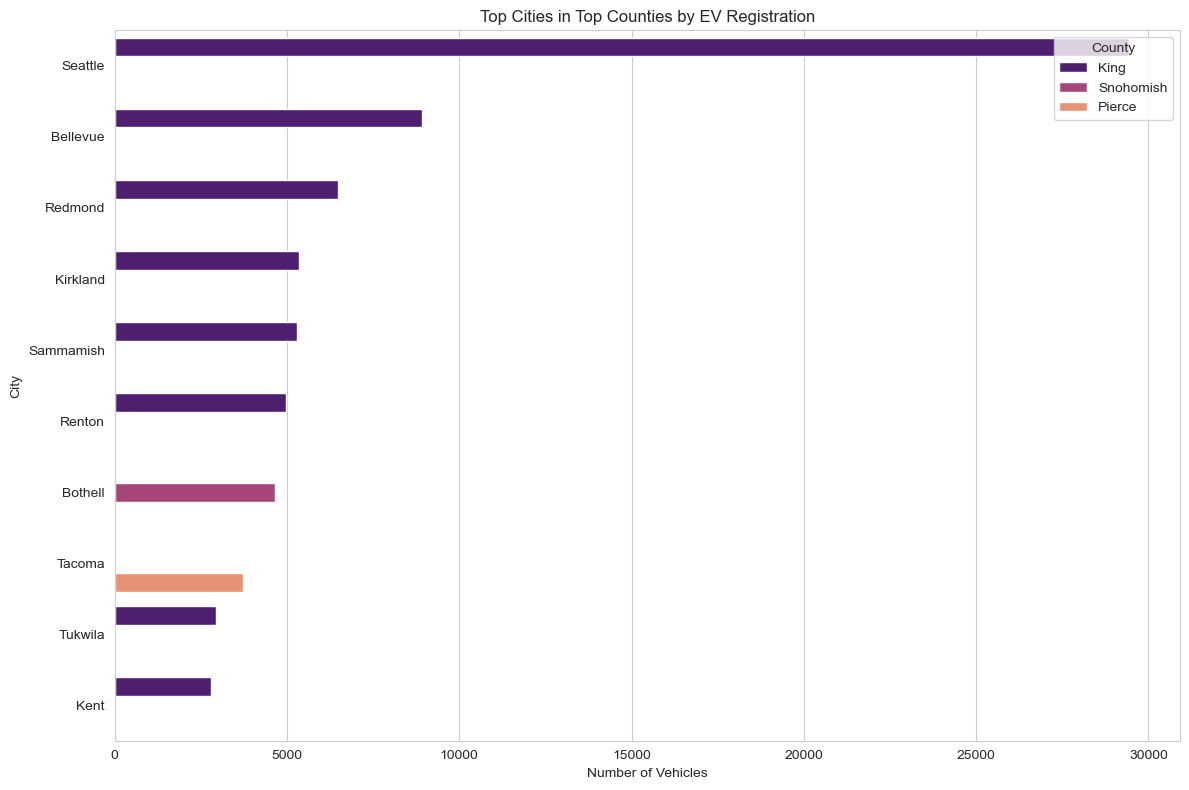

In [16]:
# geographical Distribution at county level
ev_county_distribution = ev_data_or['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# Filtering the dataset for these top countries
top_counties_data = ev_data_or[ev_data_or['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending = False)\
                                    .reset_index(name = 'Number of Vehicles')

# Visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

#plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Number of Vehicles', y = 'City', 
           hue = 'County', data = top_cities,
           palette='magma')
plt.title('Top Cities in Top Counties by EV Registration')
plt.xlabel('Number of Vehicles')
plt.ylabel('City')
plt.legend(title = 'County' )
plt.tight_layout()
plt.show()